In [1]:
import os
import pandas as pd

# Check if you're running on Kaggle
IS_KAGGLE = os.path.exists("/kaggle/input")

if IS_KAGGLE:
    dataset_path = "/kaggle/input/cafe-sales-dirty-data-for-cleaning-training/dirty_cafe_sales.csv"
else:
    dataset_path = "datasets/dirty_cafe_sales.csv"

# Load the dataset
df = pd.read_csv(dataset_path)
display(df.head())

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [2]:
# Examine data types and structure
print("Data types:")
print(df.dtypes)
print("\nDataset shape:", df.shape)
print("\nUnique values in 'Total Spent' column:")
print(df['Total Spent'].unique())

Data types:
Transaction ID      object
Item                object
Quantity            object
Price Per Unit      object
Total Spent         object
Payment Method      object
Location            object
Transaction Date    object
dtype: object

Dataset shape: (10000, 8)

Unique values in 'Total Spent' column:
['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']


In [3]:
# Clean and prepare data for correlation analysis
import numpy as np

# Create a copy of the dataframe for cleaning
df_clean = df.copy()

# Clean the 'Total Spent' column - remove non-numeric values
df_clean = df_clean[~df_clean['Total Spent'].isin(['ERROR', 'UNKNOWN'])]
df_clean = df_clean.dropna(subset=['Total Spent'])

# Convert numerical columns to proper data types
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce')
df_clean['Price Per Unit'] = pd.to_numeric(df_clean['Price Per Unit'], errors='coerce')
df_clean['Total Spent'] = pd.to_numeric(df_clean['Total Spent'], errors='coerce')

# Remove any remaining NaN values
df_clean = df_clean.dropna(subset=['Quantity', 'Price Per Unit', 'Total Spent'])

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Removed {df.shape[0] - df_clean.shape[0]} rows with invalid data")

# Display cleaned data info
print("\nCleaned data types:")
print(df_clean[['Quantity', 'Price Per Unit', 'Total Spent']].dtypes)

Original dataset shape: (10000, 8)
Cleaned dataset shape: (8544, 8)
Removed 1456 rows with invalid data

Cleaned data types:
Quantity          float64
Price Per Unit    float64
Total Spent       float64
dtype: object


In [4]:
# Create correlation matrix
numerical_cols = ['Quantity', 'Price Per Unit', 'Total Spent']
correlation_matrix = df_clean[numerical_cols].corr()

print("Correlation Matrix:")
print("=" * 50)
print(correlation_matrix)

# Display with better formatting
print("\n\nCorrelation Matrix (rounded to 4 decimal places):")
print("=" * 60)
print(correlation_matrix.round(4))

Correlation Matrix:
                Quantity  Price Per Unit  Total Spent
Quantity        1.000000        0.007795     0.705139
Price Per Unit  0.007795        1.000000     0.646845
Total Spent     0.705139        0.646845     1.000000


Correlation Matrix (rounded to 4 decimal places):
                Quantity  Price Per Unit  Total Spent
Quantity          1.0000          0.0078       0.7051
Price Per Unit    0.0078          1.0000       0.6468
Total Spent       0.7051          0.6468       1.0000


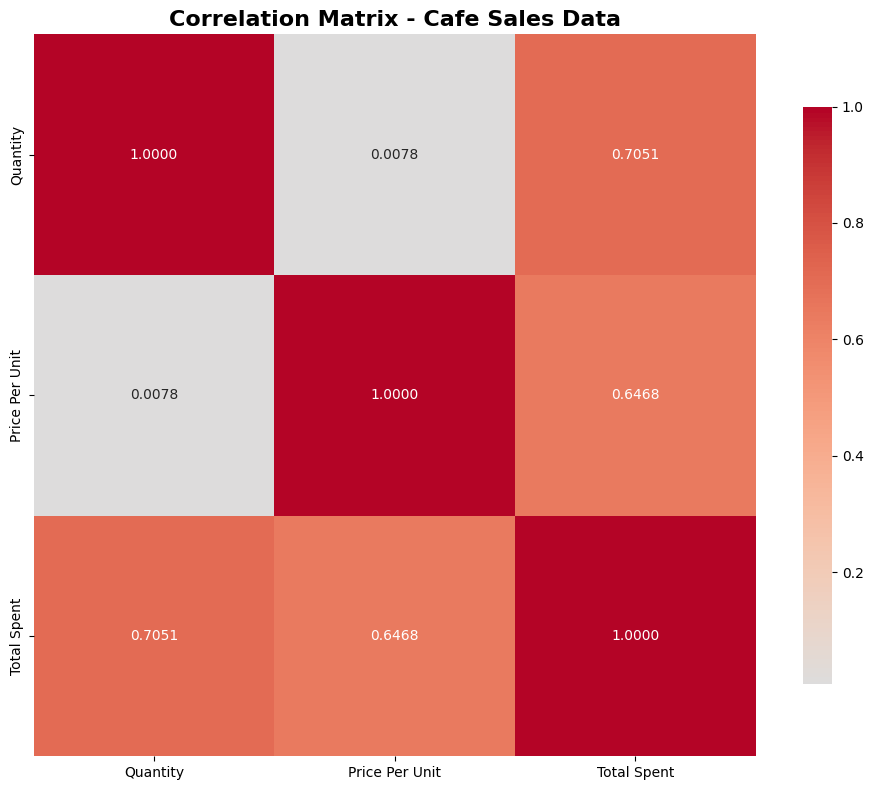


Correlation Matrix Interpretation:
• Quantity vs Total Spent: 0.7051 (Strong positive correlation)
• Price Per Unit vs Total Spent: 0.6468 (Moderate positive correlation)
• Quantity vs Price Per Unit: 0.0078 (Very weak correlation)

This makes business sense:
- Higher quantities lead to higher total spending
- Higher priced items contribute to higher total spending
- Quantity and price per unit are largely independent


In [6]:
# Create a visual correlation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colormap at 0
            square=True,          # Make cells square
            fmt='.4f',            # Format numbers to 4 decimal places
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix - Cafe Sales Data', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Print interpretation
print("\nCorrelation Matrix Interpretation:")
print("=" * 40)
print("• Quantity vs Total Spent: 0.7051 (Strong positive correlation)")
print("• Price Per Unit vs Total Spent: 0.6468 (Moderate positive correlation)")  
print("• Quantity vs Price Per Unit: 0.0078 (Very weak correlation)")
print("\nThis makes business sense:")
print("- Higher quantities lead to higher total spending")
print("- Higher priced items contribute to higher total spending")
print("- Quantity and price per unit are largely independent")